In [105]:
import numpy as np 
import pandas as pd
from minisom import MiniSom    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
from pylab import plot,axis,show,pcolor,colorbar,bone
%matplotlib inline  

In [78]:
data = pd.read_csv('iris.csv', sep=",", header=None)
data.columns = ["v1", "v2", "v3", "v4","class"]
data.head(2)

,v1,v2,v3,v4,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [79]:
#Preprocess X 
X=data[['v1','v2','v3','v4']].values
X= np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1,X)
target=data['class'].values

#Preprocess Y 
Y = np.zeros(len(target), dtype=int)
Y[target == 'setosa'] = 0
Y[target == 'versicolor'] = 1
Y[target == 'virginica'] = 2

 [   916 / 10000 ]   9% - 0:00:01 left 

 [  2021 / 10000 ]  20% - 0:00:01 left 

 [  2989 / 10000 ]  30% - 0:00:01 left 

 [  3939 / 10000 ]  39% - 0:00:01 left 

 [  4966 / 10000 ]  50% - 0:00:00 left 

 [  5889 / 10000 ]  59% - 0:00:00 left 

 [  6837 / 10000 ]  68% - 0:00:00 left 

 [  7648 / 10000 ]  76% - 0:00:00 left 

 [  8421 / 10000 ]  84% - 0:00:00 left 

 [  9372 / 10000 ]  94% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 6.0702533219364864e-05
 topographic error: 0.13333333333333333


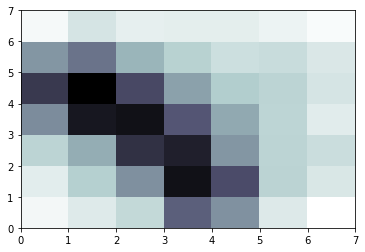

In [97]:
#Basic som implementation 
som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5,neighborhood_function='triangle', random_seed=10)
som.random_weights_init(X)
som.train_random(X,10000,verbose=True) # training with 100 iterations
plt.pcolor(som.distance_map().T, cmap='bone_r')

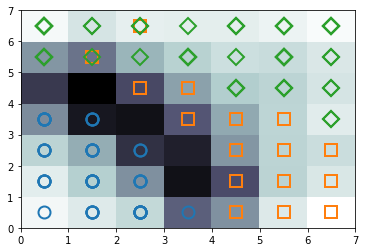

In [96]:
plt.pcolor(som.distance_map().T, cmap='bone_r') 
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[Y[cnt]], markerfacecolor='None',markeredgecolor=colors[Y[cnt]], markersize=12, 
             markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()

In [99]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
d = np.float32(np.concatenate((c1, c2, c3)))
d.shape

(150, 3)

In [107]:
!pip install somoclu

In [108]:
import somoclu

In [109]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=X)
%time som.train()

som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

NameError: name 'wrap_train' is not defined

AttributeError: 'DataFrame' object has no attribute 'dtype'